# Flipkart customer service satisfaction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

This project aims to analyze customer interactions and feedback at Flipkart, a leading e-commerce platform, to enhance customer satisfaction. As competition in e-commerce grows, delivering exceptional customer service is critical for driving growth and maintaining customer loyalty. The dataset comprises customer support interactions from various channels such as chat, phone, and email, along with feedback and CSAT scores.

The main goal is to identify the key factors that influence customer satisfaction, assess the performance of customer service teams, and develop strategies to improve service quality. By analyzing patterns in feedback, issue resolution times, and agent performance, the project seeks to pinpoint areas for improvement. Key metrics such as handling time, time-to-resolution, and customer remarks are examined to evaluate the effectiveness of existing support strategies.

Enhancing these service-related KPIs will enable Flipkart to resolve issues more efficiently while providing support tailored to diverse customer needs. This analysis will help optimize agent performance, streamline support processes, and improve CSAT scores. Ultimately, these improvements will boost Flipkart’s brand loyalty, increase customer retention, and support sustainable growth in a highly competitive market.

# **Problem Statement**


Flipkart, a leading e-commerce platform, seeks to improve customer satisfaction (CSAT) across various support channels. However, key factors influencing CSAT, such as issue resolution time and agent performance, are unclear. This project aims to analyze customer interactions and feedback to identify drivers of satisfaction, enabling Flipkart to optimize support strategies, enhance service efficiency, and boost customer loyalty in a competitive market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries for dataset cleaning and preprocessing

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import string
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/almabetter project/Customer_support_data.csv'


Mounted at /content/drive


In [ ]:
df= pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 85907
Number of columns: 20


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


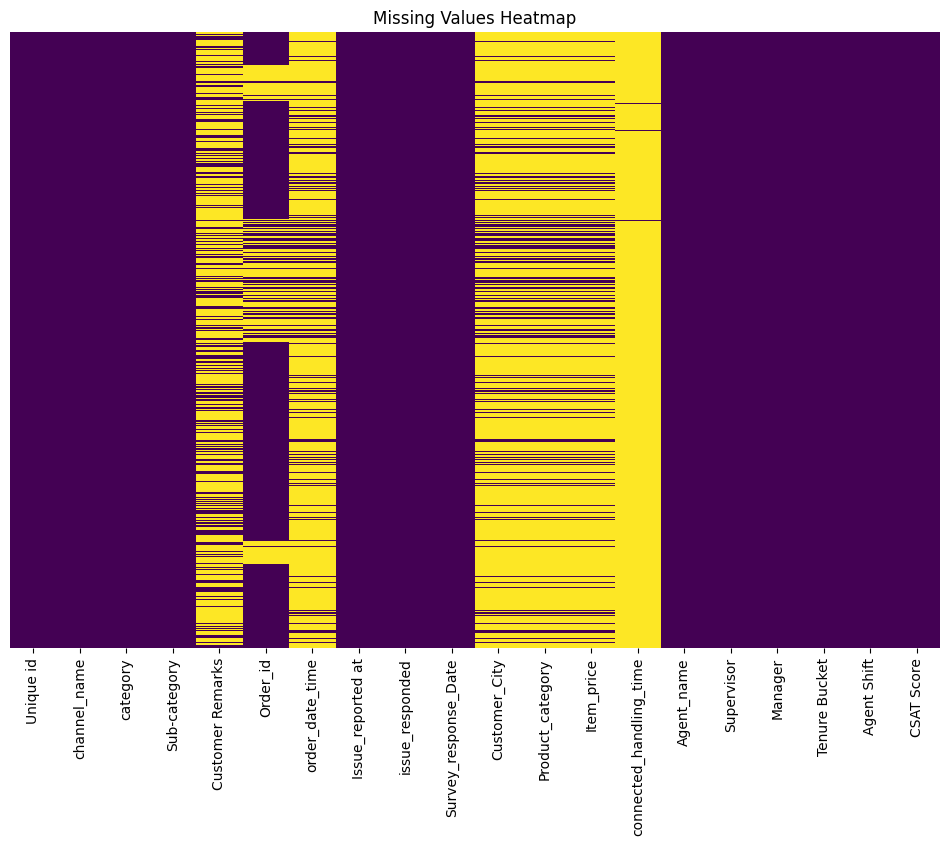

In [ ]:
# Visualizing the missing values
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset captures customer interactions, feedback, and satisfaction scores across various support channels at Flipkart.
It includes details such as customer service channel, issue reported, order information, and customer feedback. It contains both categorical and numerical data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns.tolist()

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [ ]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable
df.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Create a new column time difference to find the time taken to respond
# Convert columns to datetime with the correct format
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')

# Format the datetime columns to the desired format
df['Issue_reported at (formatted)'] = df['Issue_reported at'].dt.strftime('%d/%m/%y')
df['issue_responded (formatted)'] = df['issue_responded'].dt.strftime('%d/%m/%y')

# Calculate the time difference and convert to minutes
df['Time difference'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Issue_reported at (formatted),issue_responded (formatted),Time difference
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,...,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,01/08/23,01/08/23,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,...,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,01/08/23,01/08/23,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,...,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,01/08/23,01/08/23,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,...,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,01/08/23,01/08/23,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,...,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,01/08/23,01/08/23,2.0


In [ ]:
# Remove columns that have a lot of null values
rem_columns = ['order_date_time', 'Customer Remarks','connected_handling_time']
# Check which columns are present in the DataFrame
existing_columns_to_remove = [col for col in rem_columns if col in df.columns]

# Remove the columns if they are present
if existing_columns_to_remove:
    df = df.drop(columns=existing_columns_to_remove)
    print(f"Columns {existing_columns_to_remove} have been removed.")
else:
    print("None of the specified columns are present in the DataFrame or already been removed")

Columns ['order_date_time', 'Customer Remarks', 'connected_handling_time'] have been removed.


### What all manipulations have you done and insights you found?

Columns having too many null values have been removed which includes customer remarks, connected_handling_time and order_date_time. So its been found that CSAT score depends on remaining values. Date format has been changed to appropriate format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

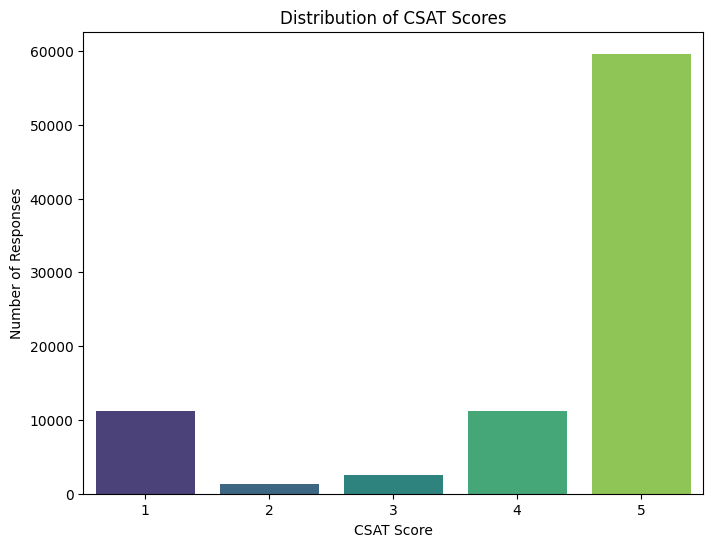

In [ ]:
# Visualization of Time Difference
plt.figure(figsize=(8,6))
sns.countplot(x='CSAT Score', data=df, palette='viridis')
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Number of Responses')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart allows comparison of CSAT scores across different interaction channels.

##### 2. What is/are the insight(s) found from the chart?

Certain channels like 'Email' have higher satisfaction scores compared to others like 'Phone', indicating varying effectiveness across channels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying underperforming channels can guide resource allocation and training to improve customer satisfaction.

#### Chart - 2

Text(0, 0.5, 'Time Difference (minutes)')

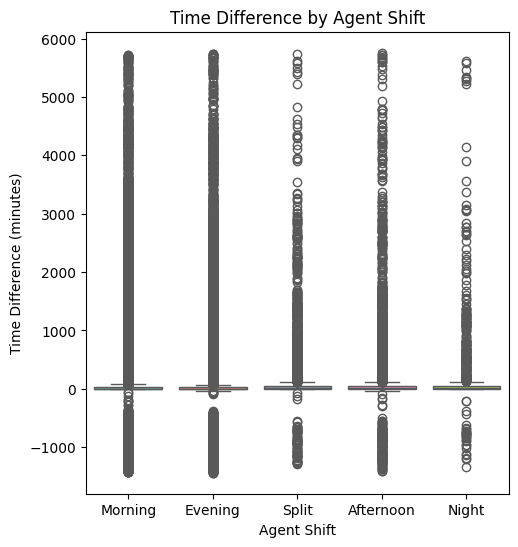

In [ ]:
# Boxplot of Time Difference by Agent Shift
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agent Shift', y='Time difference', data=df, palette='Set2')
plt.title('Time Difference by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Time Difference (minutes)')

##### 1. Why did you pick the specific chart?

The boxplot showing Time Difference by Agent Shift provides a visual summary of the distribution of time differences for each shift period (Morning, Evening, Night). It shows variability of data, outliers etc

##### 2. What is/are the insight(s) found from the chart?

Mornings might show a narrower interquartile range (IQR) and a lower median time difference, suggesting more consistent and quicker response times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. it can be found that morning are peak productive time from this or more people work in mornings.

#### Chart - 3

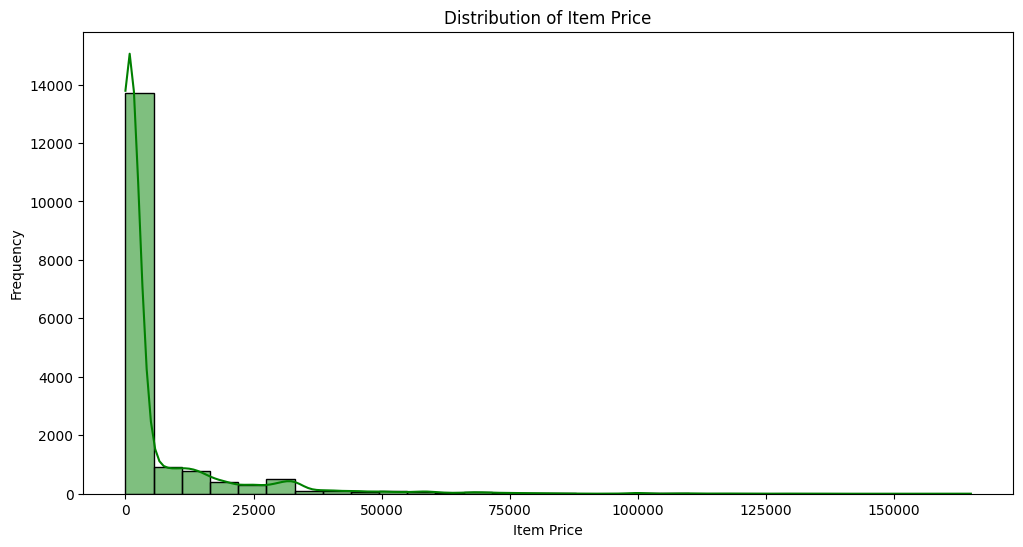

In [ ]:
# Distribution of item pricing
plt.figure(figsize=(12, 6))
sns.histplot(df['Item_price'], kde=True, bins=30, color='green')
plt.title('Distribution of Item Price')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

TO find categorical majority of prices of products

##### 2. What is/are the insight(s) found from the chart?

Most products are from less than 25000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not really

#### Chart - 4

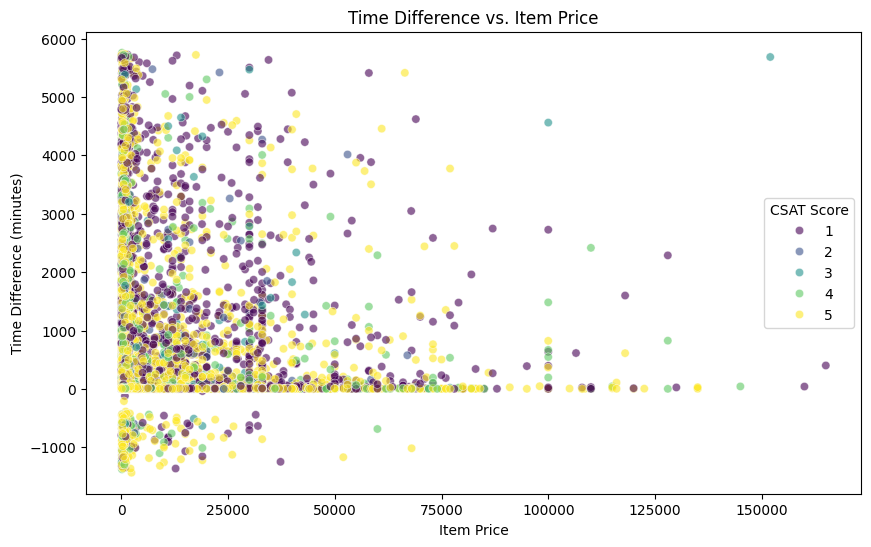

In [ ]:
# Scatter plot of Time Difference vs. Item Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_price', y='Time difference', data=df, hue='CSAT Score', palette='viridis', alpha=0.6)
plt.title('Time Difference vs. Item Price')
plt.xlabel('Item Price')
plt.ylabel('Time Difference (minutes)')
plt.legend(title='CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Visualizes the relationship between Time difference and Item Price. By using CSAT Score as the hue, it adds a layer of information, showing how customer satisfaction scores vary with these two variables

##### 2. What is/are the insight(s) found from the chart?

Can see if the pattern in customer satisfaction relative to the time difference and item price

##### 3. Will the gained insights help creating a positive business impact?

Understand the relationship between response times and item prices can help in identifying areas for improvement.

#### Chart - 5

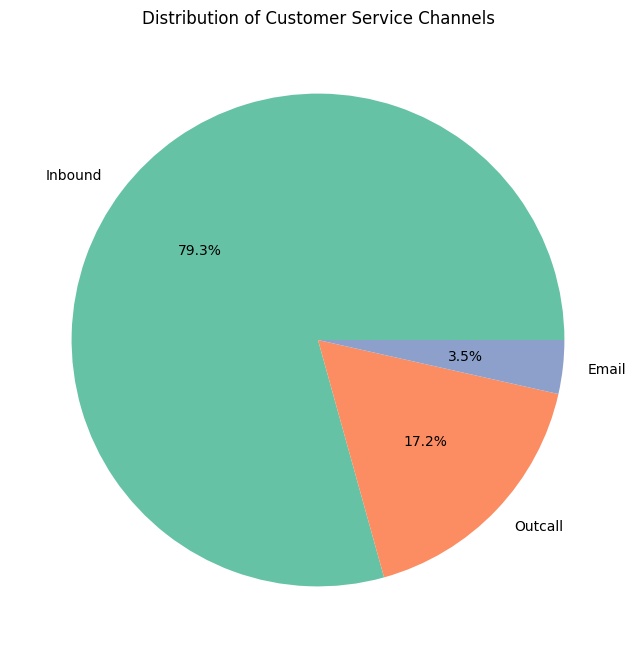

In [ ]:
# Count the occurrences of each channel type
channel_counts = df['channel_name'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Customer Service Channels')
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart provides a clear, visual representation of the distribution of different customer service channels in the dataset

##### 2. What is/are the insight(s) found from the chart?

It helps to understand which channels are most and least used by customers, that is, inbound.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. it Helps in planning and optimizing customer service operations based on channel usage trends.

#### Chart - 6

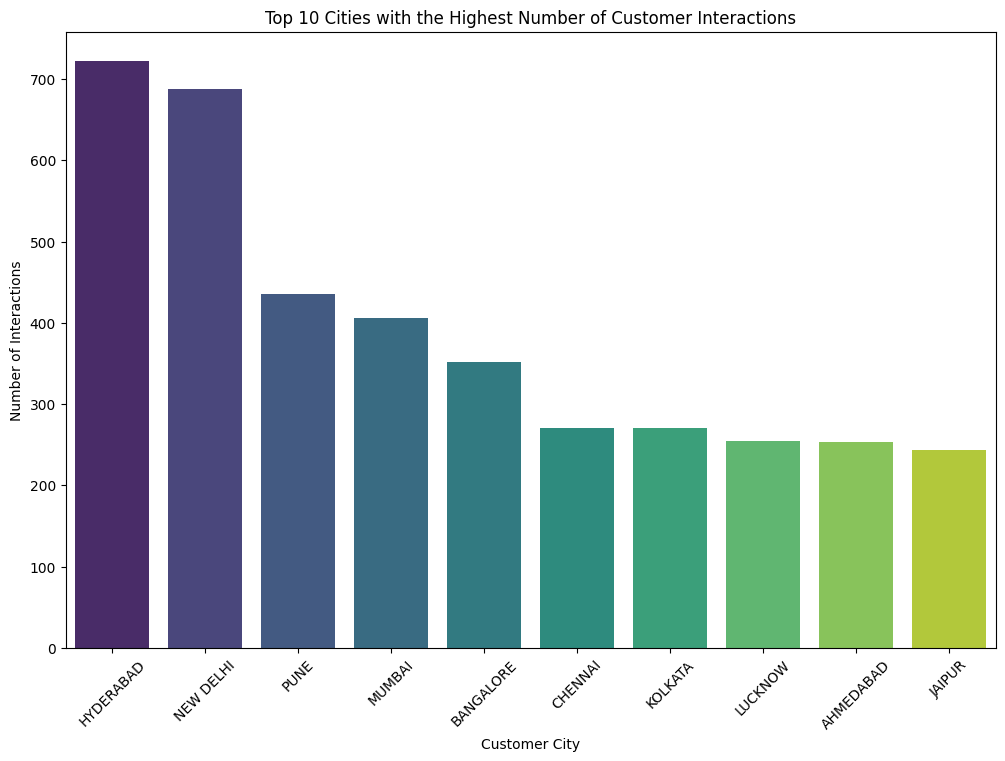

In [ ]:
# City counts top 10
# Count the occurrences of each city and get the top 10
top_cities = df['Customer_City'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities with the Highest Number of Customer Interactions')
plt.xlabel('Customer City')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart provides a visual representation of the number of interactions or feedback received from the top 10 cities. This helps in understanding the distribution of customer service requests.

##### 2. What is/are the insight(s) found from the chart?

Hyderabad is the city from where most customers require customer support , closely followed by New Delhi

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By finding the cities from where most requests are acquired, much support vould b given there.

#### Chart - 7

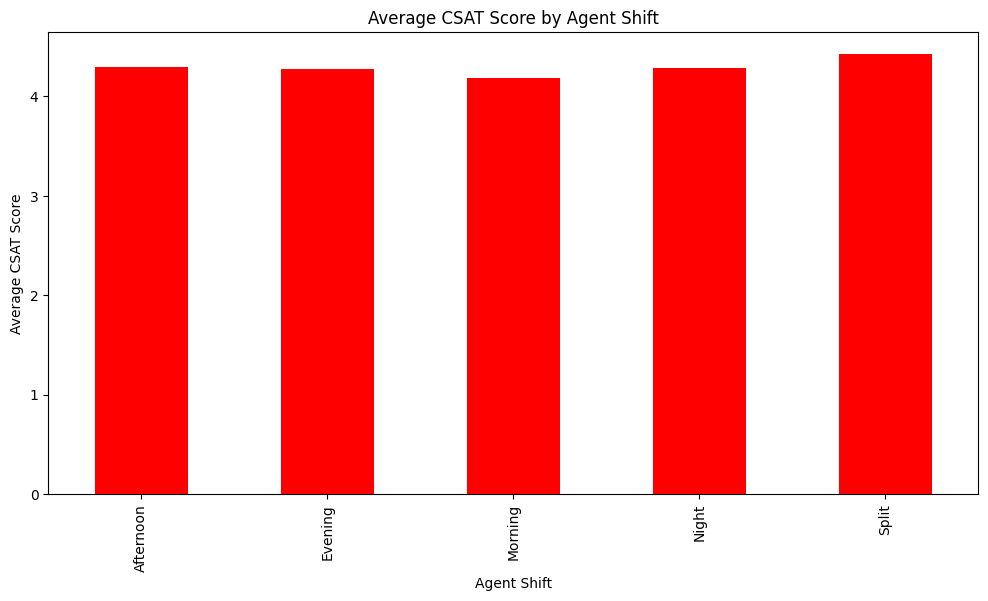

In [ ]:
# Agent Shift vs. CSAT Score
plt.figure(figsize=(12, 6))
df.groupby('Agent Shift')['CSAT Score'].mean().plot(kind='bar', color='red')
plt.title('Average CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Average CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

It helps in comparing how satisfaction varies across different times of the day when different shifts are handling customer querie

##### 2. What is/are the insight(s) found from the chart?

Most customers are calling during split time and mostly the data have an even distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. it helps to find peak time

#### Chart - 8

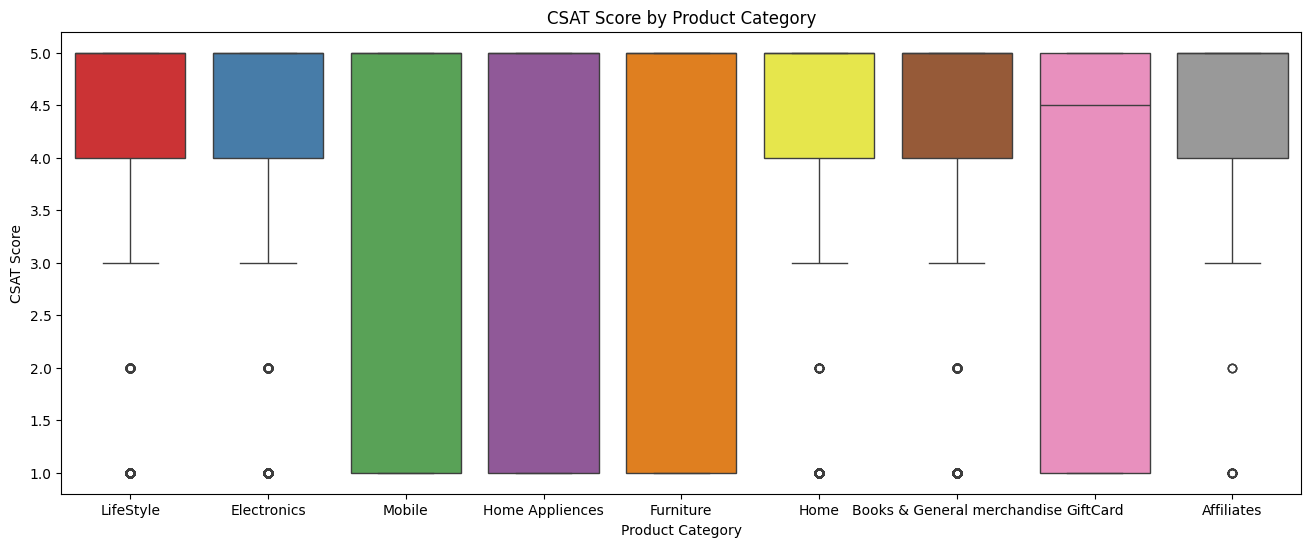

In [ ]:
# CSAT score by product category
plt.figure(figsize=(16, 6))
sns.boxplot(x='Product_category', y='CSAT Score', data=df, palette='Set1')
plt.title('CSAT Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

The box plot visualizes the distribution of CSAT scores across different product categories. It helps in understanding the range, median, and variability of customer satisfaction scores for each product category.

##### 2. What is/are the insight(s) found from the chart?

Shows how CSAT scores are distributed within each product category, including the median, quartiles, and potential outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Useful for identifying which product categories are performing well and which might require attention or improvement.

#### Chart - 9

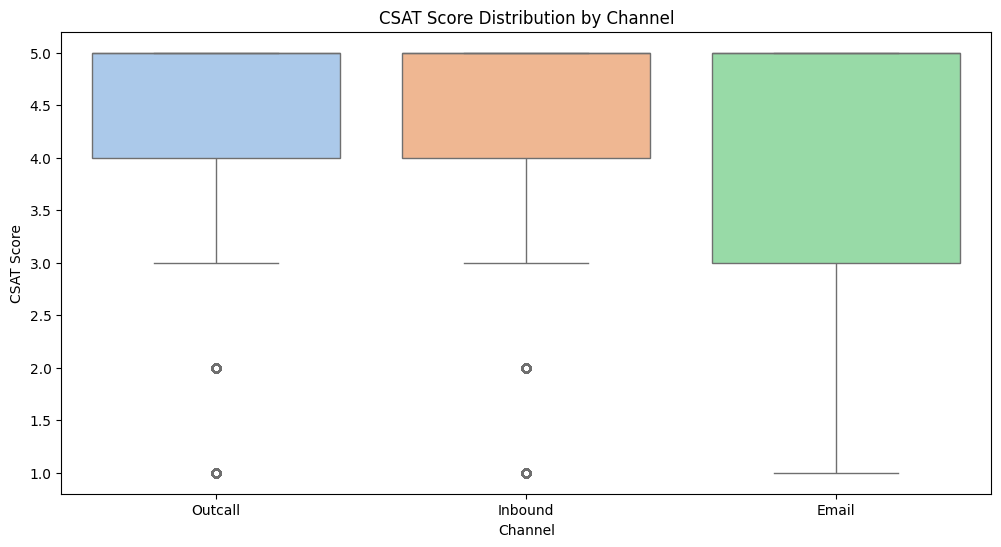

In [ ]:
# CSAT Score Distribution by Channel
plt.figure(figsize=(12, 6))
sns.boxplot(x='channel_name', y='CSAT Score', data=df, palette='pastel')
plt.title('CSAT Score Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CSAT Score')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

The box plot visualizes the distribution of CSAT scores across different channels.

##### 2. What is/are the insight(s) found from the chart?

Highlights how satisfaction scores vary across different customer service channels, revealing which channels may require more focus or improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Shows the most used or frequented channel for customer service and their satisfaction frequency.

#### Chart - 10

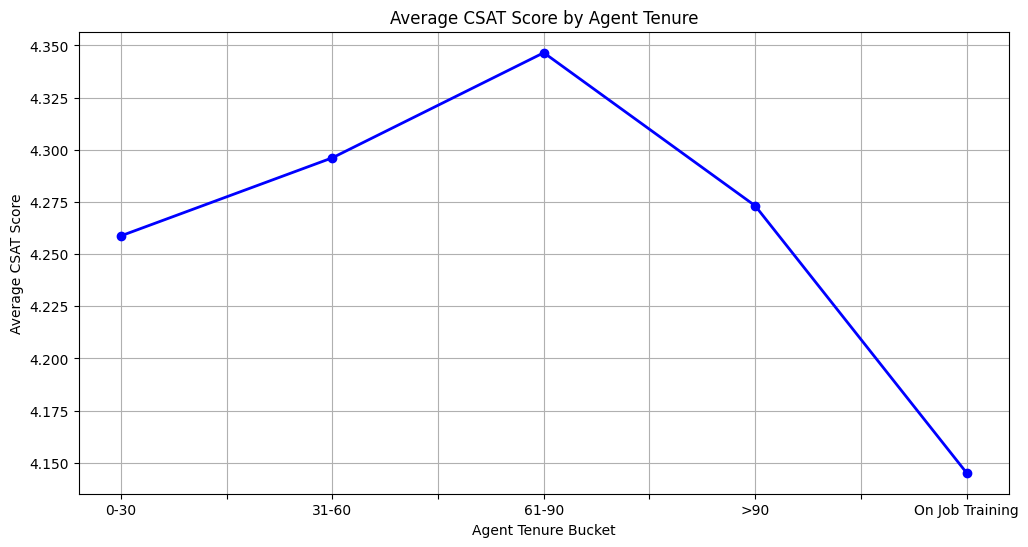

In [ ]:
# Agent Tenure vs. Average CSAT Score
plt.figure(figsize=(12, 6))
tenure_scores = df.groupby('Tenure Bucket')['CSAT Score'].mean()
tenure_scores.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Average CSAT Score by Agent Tenure')
plt.xlabel('Agent Tenure Bucket')
plt.ylabel('Average CSAT Score')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

line plot visualizes trends in average CSAT scores across different tenure buckets

##### 2. What is/are the insight(s) found from the chart?

61-90 have highest Csat score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This line plot visualizes trends in average CSAT scores across different tenure buckets, making it easier to observe any upward or downward trends as agents gain experience

#### Chart - 11

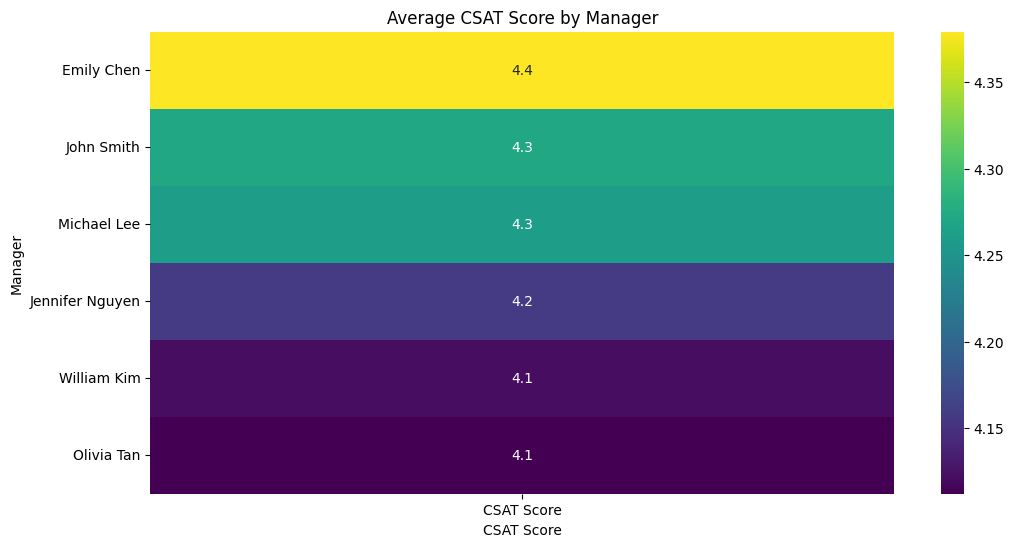

In [ ]:
# Managers and their average csat score
plt.figure(figsize=(12, 6))
manager_csat = df.pivot_table(index='Manager', values='CSAT Score', aggfunc='mean').sort_values(by='CSAT Score', ascending=False)
sns.heatmap(manager_csat, annot=True, cmap='viridis', fmt='.1f')
plt.title('Average CSAT Score by Manager')
plt.xlabel('CSAT Score')
plt.ylabel('Manager')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap helps to find the density of a value from the dataset

##### 2. What is/are the insight(s) found from the chart?

Emily chen as a manager have highest average csat score.

#### Chart - 12

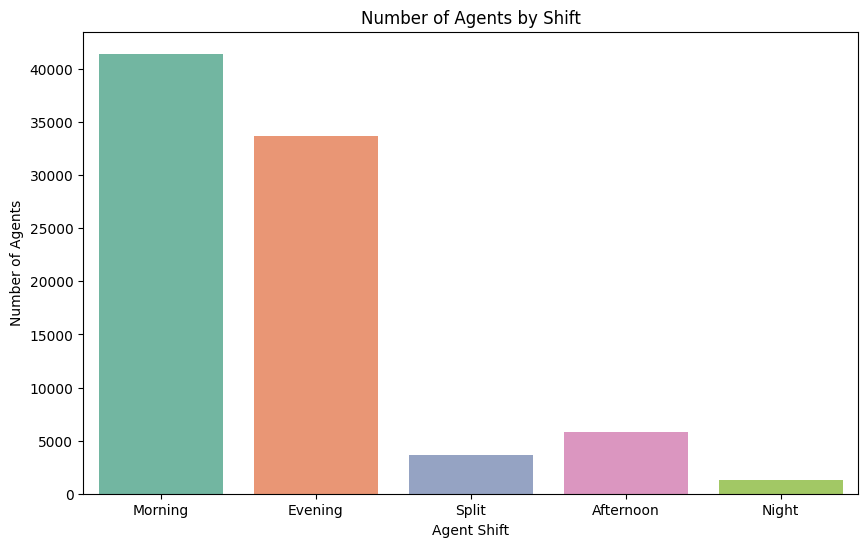

In [ ]:
# Agents assigned each shift total overtime
plt.figure(figsize=(10, 6))
sns.countplot(x='Agent Shift', data=df, palette='Set2')
plt.title('Number of Agents by Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Agents')
plt.show()

##### 1. Why did you pick the specific chart?

BAr plot shows categorical value of different shifts in total of dataset.

##### 2. What is/are the insight(s) found from the chart?

On total, most people work in mornings and less people at night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

CAn be useful when there is a need to balance the agents working each shift.

## Chart 13

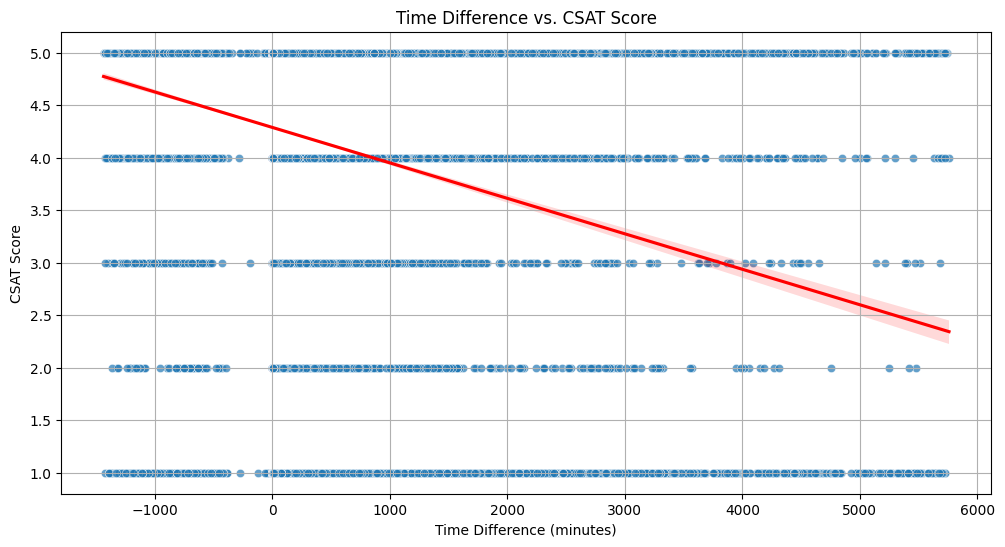

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time difference', y='CSAT Score', data=df, palette='viridis', alpha=0.7)
sns.regplot(x='Time difference', y='CSAT Score', data=df, scatter=False, color='red')

plt.title('Time Difference vs. CSAT Score')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('CSAT Score')
plt.grid(True)
plt.show()

1. Why did you pick the specific chart?

Scatter plot with a regression line can help identify any potential relationship between the two variables.
Scatter Plot: Displays individual data points representing Time Difference and CSAT Score, which helps visualize the distribution and any potential correlation.
Regression Line: The red line represents the best-fit line for the data points, showing the trend and direction of the relationship between Time Difference and CSAT Score

2. What is/are the insight(s) found from the chart?

Helps identify if there's a positive, negative, or no correlation between the time taken to handle issues and customer satisfaction score

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Time Difference and CSAT Score

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between Time Difference and CSAT Score. The time taken to respond to customer issues does not significantly affect customer satisfaction.
Alternative Hypothesis (H1): There is a significant relationship between Time Difference and CSAT Score. The time taken to respond to customer issues significantly affects customer satisfaction.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation coefficient
rho, p_value = spearmanr(df['Time difference'], df['CSAT Score'])

print(f'Spearman\'s rank correlation coefficient: {rho}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Time Difference and CSAT Score.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Time Difference and CSAT Score.")

Spearman's rank correlation coefficient: -0.1776416441206597
P-value: 0.0
Reject the null hypothesis: There is a significant relationship between Time Difference and CSAT Score.


##### Which statistical test have you done to obtain P-Value?

Spearman's Rank Correlation.

##### Why did you choose the specific statistical test?

Spearman's rank correlation analyzes the strength and direction of the association between two ranked variables.

### Hypothetical Statement - 2

 Agent Shift and Average CSAT Score

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average CSAT Score between different Agent Shifts.
Alternative Hypothesis (H1): There is a significant difference in the average CSAT Score between different Agent Shifts.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import kruskal

# Group data by Agent Shift and get CSAT Scores for each group
groups = [df[df['Agent Shift'] == shift]['CSAT Score'] for shift in df['Agent Shift'].unique()]

# Perform Kruskal-Wallis H test
h_statistic, p_value = kruskal(*groups)

print(f'Kruskal-Wallis H statistic: {h_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average CSAT Score between different Agent Shifts.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average CSAT Score between different Agent Shifts.")

Kruskal-Wallis H statistic: 151.58004948556504
P-value: 9.335020551858379e-32
Reject the null hypothesis: There is a significant difference in the average CSAT Score between different Agent Shifts.


##### Which statistical test have you done to obtain P-Value?

Kruskal-Wallis H test.

##### Why did you choose the specific statistical test?

Kruskal-Wallis H test is used to determine if there are statistically significant differences between the medians of three or more independent groups. A higher statistic suggests greater differences between group medians.

### Hypothetical Statement - 3

Item price and CSAT Score

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant correlation between Item Price and CSAT Score.
Alternate Hypothesis (H1): There is a significant correlation between Item Price and CSAT Score.

#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats
# Drop rows with NaN values in 'Item_price' or 'CSAT Score' to ensure valid correlation calculation
df_clean = df[['Item_price', 'CSAT Score']].dropna()

# Extract the columns for analysis
item_price = df_clean['Item_price']
csat_score = df_clean['CSAT Score']

# Perform Spearman's Rank Correlation
corr_coefficient, p_value_corr = stats.spearmanr(item_price, csat_score)

# Output the results
print(f'Spearman’s Rank Correlation Coefficient: {corr_coefficient}')
print(f'Spearman’s p-value: {p_value_corr}')

# Interpretation of the result
alpha = 0.05  # Significance level

if p_value_corr < alpha:
    print("Reject the null hypothesis: There is a significant correlation between Item Price and CSAT Score.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between Item Price and CSAT Score.")

Spearman’s Rank Correlation Coefficient: -0.09272855529774635
Spearman’s p-value: 3.568927923149843e-34
Reject the null hypothesis: There is a significant correlation between Item Price and CSAT Score.


##### Which statistical test have you done to obtain P-Value?

Spearman’s Rank Correlation

##### Why did you choose the specific statistical test?

This test helps you determine whether there's a significant monotonic relationship between item prices and customer satisfaction scores.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Order_id,18232
Issue_reported at,0
issue_responded,0
Survey_response_Date,0
Customer_City,68828
Product_category,68711


In [ ]:
# Drop the columns having too many null values
columns_to_drop = ['Item_price','Product_category','Customer_City']
# Loop through the columns and drop if they exist in the dataframe
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

In [ ]:
# Since order_id is a value to uniquely identify each row, it is filled using forward/backward filling.
df['Order_id'].fillna(method='ffill', inplace=True)
df.head()
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Order_id,0
Issue_reported at,0
issue_responded,0
Survey_response_Date,0
Agent_name,0
Supervisor,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Columns contaiining more than 70% null values are dropped from the dataframe and the column used to uniquely identify each row in the dataset is filled in with order ids generated by forward/ backward filling based on the assumption that the same customer or nearby entries might share an order ID.

### 2. Handling Outliers

Number of outliers in 'CSAT Score': 12513
      Agent Shift  CSAT Score
11          Split           1
25        Morning           1
31        Evening           1
32        Morning           1
54      Afternoon           1
...           ...         ...
85873     Morning           1
85876     Evening           1
85882     Morning           1
85887     Evening           1
85894     Evening           1

[12513 rows x 2 columns]


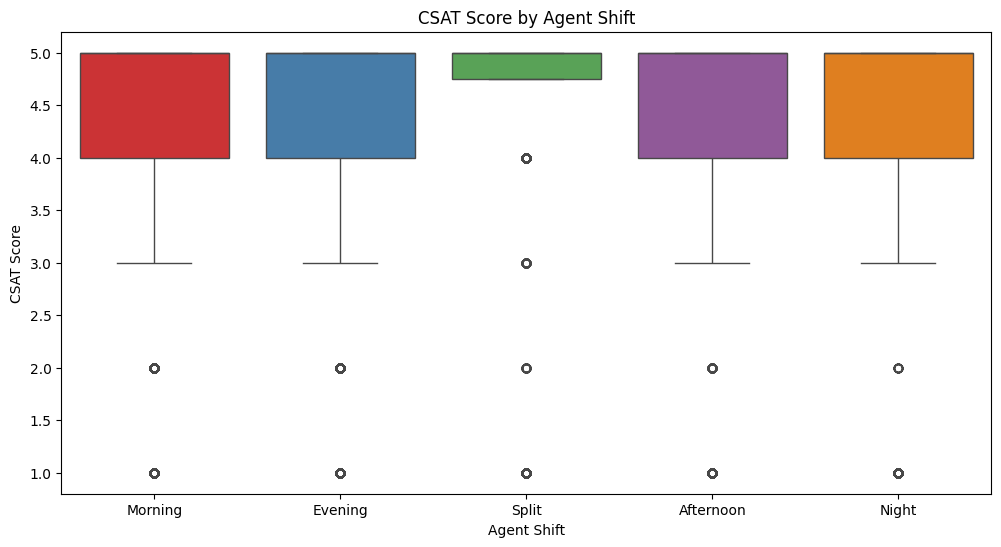

In [ ]:
# Handling Outliers & Outlier treatments

# Calculate the IQR for 'CSAT Score'
Q1 = df['CSAT Score'].quantile(0.25)
Q3 = df['CSAT Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'CSAT Score'
outliers = df[(df['CSAT Score'] < lower_bound) | (df['CSAT Score'] > upper_bound)]

print("Number of outliers in 'CSAT Score':", outliers.shape[0])
print(outliers[['Agent Shift', 'CSAT Score']])

# Plot CSAT Score by Agent Shift
plt.figure(figsize=(12, 6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df, palette='Set1')
plt.title('CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Capped outlier values to boundary values to get the data even.

In [ ]:
# Remove columns that have no effects on testing like ids and timestamps
to_remove = ['Unique id','Order_id','Issue_reported at','issue_responded','Issue_reported at (formatted)','issue_responded (formatted)','Survey_response_Date']
# Loop through the columns and drop if they exist in the dataframe
df.drop(columns=[col for col in to_remove if col in df.columns], axis=1, inplace=True)

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
df.head()

,channel_name,category,Sub-category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Time difference
0,Outcall,Product Queries,Life Insurance,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0
1,Outcall,Product Queries,Product Specific Information,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0
2,Inbound,Order Related,Installation/demo,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0
3,Inbound,Returns,Reverse Pickup Enquiry,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0
4,Inbound,Cancellation,Not Needed,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0


####  Lower Casing

In [ ]:
# Lower Casing
columns_to_clean = ['channel_name','category','Sub-category','Agent_name','Supervisor','Manager','Tenure Bucket','Agent Shift']
# Convert specified columns to lowercase
df[columns_to_clean] = df[columns_to_clean].applymap(lambda x: x.lower() if isinstance(x, str) else x)

####Removing punctuation

In [ ]:
# Remove punctuations from specified columns
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].str.replace(f'[{string.punctuation}]', '', regex=True)

####Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
for col in columns_to_clean:
    if col in df.columns:
        # Remove URLs
        df[col] = df[col].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)
        # Remove words containing digits
        df[col] = df[col].str.replace(r'\b\w*\d\w*\b', '', regex=True)

####Removing White spaces

In [ ]:
# Remove White spaces
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].str.strip()
df.head()

,channel_name,category,Sub-category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Time difference
0,outcall,product queries,life insurance,richard buchanan,mason gupta,jennifer nguyen,on job training,morning,5,34.0
1,outcall,product queries,product specific information,vicki collins,dylan kim,michael lee,,morning,5,2.0
2,inbound,order related,installationdemo,duane norman,jackson park,william kim,on job training,evening,5,22.0
3,inbound,returns,reverse pickup enquiry,patrick flores,olivia wang,john smith,,evening,5,20.0
4,inbound,cancellation,not needed,christopher sanchez,austin johnson,michael lee,,morning,5,2.0


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

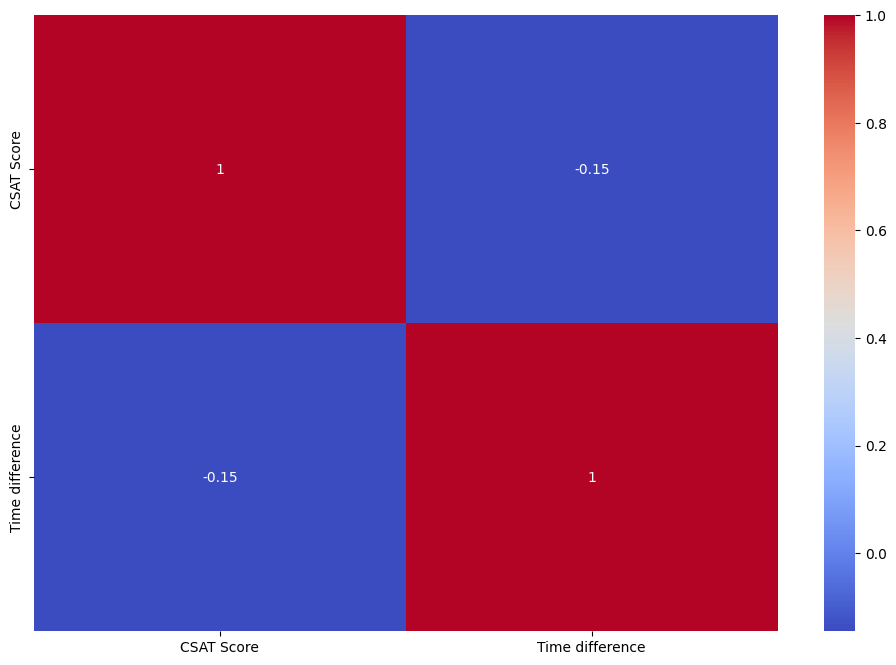

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Compute correlation matrix
# Select only numeric columns from the dataframe
df_numeric = df.select_dtypes(include=[float, int])

# Compute correlation matrix on numeric columns
corr_matrix = df_numeric.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Time difference is already calculated by finding difference between respond time and report time

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

Correlation mmatrix has been used to find which columns have higher connection with CSAT Score and that is selected.

##### Which all features you found important and why?

Time difference is one feature which has higher connection to CSAT score and it can be used to predict CSAT score.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Convert continuous CSAT Score into categories for classification
df['CSAT Score Category'] = pd.cut(df['CSAT Score'], bins=[1,2,3,4,5,6], labels=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'])

# Use LabelEncoder to convert categorical features (Channel name,CSAT Category and Agent shift) into numeric values.
label_encoder = LabelEncoder()
df['channel_name'] = label_encoder.fit_transform(df['channel_name'])
df['Agent Shift'] = label_encoder.fit_transform(df['Agent Shift'])
df['CSAT Score Category'] = label_encoder.fit_transform(df['CSAT Score Category'])

# Select features and target variables
X = df[['Time difference','Agent Shift']]
y = df['CSAT Score Category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
''' Logistic Regression is used for classifying tasks.
And here, time difference and agent shift is used to predict csat score since it has the higher correlation.'''

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6005121638924455
              precision    recall  f1-score   support

           0       0.13      0.01      0.02      2277
           1       0.72      0.82      0.77     11934
           2       0.02      0.05      0.03       503
           3       0.01      0.02      0.02       227
           4       0.25      0.21      0.23      2241

    accuracy                           0.60     17182
   macro avg       0.23      0.22      0.21     17182
weighted avg       0.55      0.60      0.57     17182



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

#Splits the data into k folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Implement cross validation
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_results.mean()} ± {cv_results.std()}')

Cross-Validation Accuracy: 0.5926410019202759 ± 0.02678929248426011


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Set up grid search cv
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Score: 0.6872462713714078


##### Which hyperparameter optimization technique have you used and why?

Hyperparameter tuning is finding the best parameters the your model to improve its performance. GridSearchCV is used a hyperparameter optimization technique since it works well with classification algorithms.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. The accuracy score after using grid search cv has went up than initial test of model.

# **Conclusion**

Machine learning model to create a logistic rregression task to predict CSAT Score based on features like time difference and agent shift has been successfully implemented with an accuracy score of 68%.